# Modeling
In this notebook, we'll be modeling the data we've previously prepared. Out notebook will be laid out as follows:

1. Model Selection & Generation
2. Hyperparameter Optimization
3. Fine-Tuning (if needed)
4. Reporting Best Model(s) + Settings
5. Interpretation
6. Conclusion

Our eventual goal here is two-fold:

1. Accurately [and fairly] model the diabetes dataset
2. Interpret the results to find something worth recommending to those wanting to reduce risk of diabetes. This can be via LIME/SHAP (i.e. some interpretable model that approximates the neural network) or via analyzing a more simple model's structure (i.e. regression coefficients, random forest decision boundaries)

In [1]:
# Environment Setup
from utils.model import *
from utils.dataset import *

***
## Model Selection & Generation

<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]


/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



<Test Report>
Precision: [no diabetes] 0.9407131011608624, [pre-diabetes] 0.34125237191650853, [diabetes] 0.02788074133763094
Recall: [no diabetes] 0.6901335953768045, [pre-diabetes] 0.6360164096760503, [diabetes] 0.18682505399568033
F1-Score: [no diabetes] 0.7961725845850709, [pre-diabetes] 0.4441809918988342, [diabetes] 0.048520544103211334
Support: [no diabetes] 42741, [pre-diabetes] 7069, [diabetes] 926
Accuracy: 67.3407%
Macro-F1: 0.4296


/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


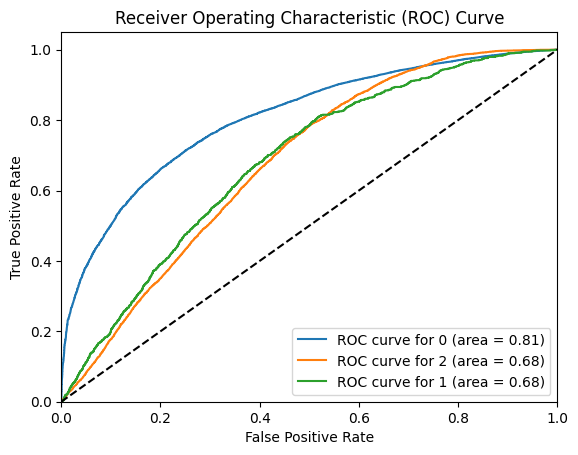

<Model Selected> :: ffnn-classifier-[p_0.4161]-[r_0.3972]-[f_0.3869]-[a_76.0742]

<Test Report>
Precision: [no diabetes] 0.8749764506405425, [pre-diabetes] 0.028270136863361005, [diabetes] 0.344954128440367
Recall: [no diabetes] 0.8693058187688636, [pre-diabetes] 0.13606911447084233, [diabetes] 0.18616494553685103
F1-Score: [no diabetes] 0.8721319171410129, [pre-diabetes] 0.04681404421326398, [diabetes] 0.2418228592429254
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 76.0742%
Macro-F1: 0.3869


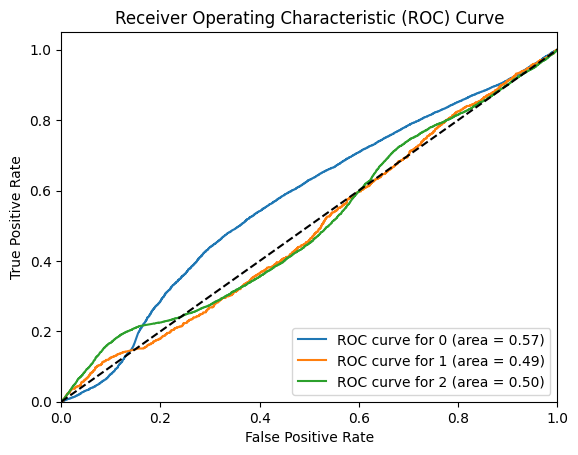

/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



<Test Report>
Precision: [no diabetes] 0.9571128550900851, [pre-diabetes] 0.3327771329077191, [diabetes] 0.028437468147997146
Recall: [no diabetes] 0.6077770758756229, [pre-diabetes] 0.6488895176121092, [diabetes] 0.30129589632829373
F1-Score: [no diabetes] 0.7434532497638877, [pre-diabetes] 0.43993669975543087, [diabetes] 0.051969823973176864
Support: [no diabetes] 42741, [pre-diabetes] 7069, [diabetes] 926
Accuracy: 60.7912%
Macro-F1: 0.4118


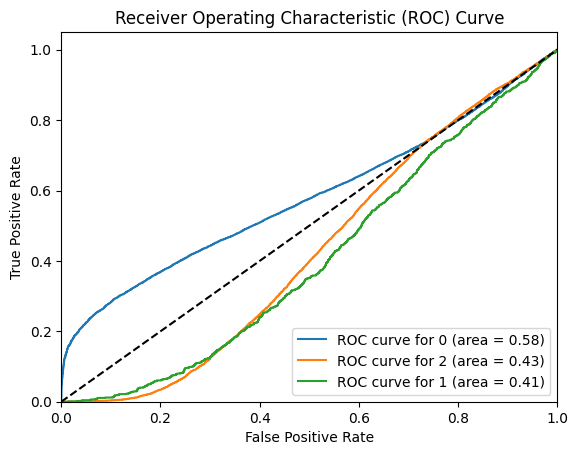

In [2]:
# generate lookup for models
models = {
    "tree": TreeClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True),
    "ffnn": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True, loss_balance=False),
    "log": LogClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True)
}

# manual search
models["tree"].set_hyperparams({
    "loss": "log_loss",
    "learning_rate": 0.01,
    "n_estimators": 100,
    "criterion": "friedman_mse",
    "min_samples_split": 5,
    "min_samples_leaf": 5,
    "max_depth": 8,
    "n_iter_no_change": 5,
    "max_features": "sqrt",
    "tol": 0.0001
})
models["ffnn"].set_hyperparams({
    "input_size": 21,
    "output_size": 3,
    "hidden_size": 1024,
    "num_hidden": 4,
    "num_epochs": 50,
    "batch_size": 64,
    "learning_rate": 5e-05,
    "dropout_rate": 0.9,
    "classify_fn": "sigmoid"
})

# train & test basic model
skip_models = []# ["log", "ffnn", "tree"]
for mt, model in models.items():
    # attempt to load, else train and test
    if (mt in skip_models) or (not model.load_model()):
        model.train_model(verbose=2)
    model.test_model()

***
## Hyperparameter Optimization

In [3]:
# optimize hyperparams
# optimizer_results = {model_type: model.optimize_hyperparams(kfold=2) for model_type, model in models.items()}
# print(optimizer_results)

***
## Fine-Tuning + Other Adjustments

***
## Best Model Report

In [4]:
models["log"].explain_model()

{'high_bp': -0.23327178047453906,
 'high_chol': -0.334126644121848,
 'chol_check': -0.15132506947633687,
 'bmi': -0.40283705380462403,
 'smoker': 0.0,
 'stroke': 0.0,
 'heart_disease': 0.0,
 'physical_activity': 0.004631891965842328,
 'fruits': 0.040052444835019095,
 'veggies': 0.0,
 'heavy_drinker': 0.05994501018275364,
 'healthcare': 0.0,
 'no_doc_bc_cost': -0.05123929528640953,
 'general_health': -0.639927900219654,
 'mental_health': 0.014953609073340198,
 'physical_health': 0.1436857442771119,
 'diff_walk': 0.0,
 'sex': -0.024910195125215147,
 'age': -0.4073858118266818,
 'education': 0.08061386743733419,
 'income': 0.0226290781615139}

***
## Interpretation

***
## Conclusion